Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Load Data

In [2]:
crime_data_df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [3]:
crime_data_df.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
crime_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   division_number      852950 non-null  int64  
 1   date_reported        852950 non-null  object 
 2   date_occurred        852950 non-null  object 
 3   area                 852950 non-null  int64  
 4   area_name            852950 non-null  object 
 5   reporting_district   852950 non-null  int64  
 6   part                 852950 non-null  int64  
 7   crime_code           852950 non-null  int64  
 8   crime_description    852950 non-null  object 
 9   modus_operandi       734639 non-null  object 
 10  victim_age           852950 non-null  int64  
 11  victim_sex           740344 non-null  object 
 12  victim_descent       740336 non-null  object 
 13  premise_code         852940 non-null  float64
 14  premise_description  852432 non-null  object 
 15  weapon_code      

In [5]:
crime_data_df.isnull().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

In [6]:
df = crime_data_df.drop(["modus_operandi","weapon_code","weapon_description", "crime_code_2","crime_code_3","crime_code_4", 
                        "cross_street"], axis = 1)

In [7]:
df.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [8]:
df.isnull().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
status                      0
status_description          0
crime_code_1               11
location                    0
latitude                    0
longitude                   0
dtype: int64

In [9]:
df.sort_values("date_reported")

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,M,O,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,M,X,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,X,X,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,M,B,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,F,W,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,NaN,NaN,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,NaN,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,NaN,NaN,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973


In [10]:
df.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
status                  object
status_description      object
crime_code_1           float64
location                object
latitude               float64
longitude              float64
dtype: object

In [11]:
df["date_reported"] = pd.to_datetime(df["date_reported"],format = '%Y-%m-%d' )
df["date_occurred"] = pd.to_datetime(df["date_occurred"],format = '%Y-%m-%d')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   division_number      852950 non-null  int64         
 1   date_reported        852950 non-null  datetime64[ns]
 2   date_occurred        852950 non-null  datetime64[ns]
 3   area                 852950 non-null  int64         
 4   area_name            852950 non-null  object        
 5   reporting_district   852950 non-null  int64         
 6   part                 852950 non-null  int64         
 7   crime_code           852950 non-null  int64         
 8   crime_description    852950 non-null  object        
 9   victim_age           852950 non-null  int64         
 10  victim_sex           740344 non-null  object        
 11  victim_descent       740336 non-null  object        
 12  premise_code         852940 non-null  float64       
 13  premise_descri

In [13]:
df.describe(include = ['float64', 'int64'])

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,852939.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,500.486350,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,207.493864,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,331.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [14]:
df["victim_age"].value_counts()

 0      211842
 30      19421
 35      19008
 31      18603
 29      18552
         ...  
 97         63
-1          60
-2          13
 120         1
-3           1
Name: victim_age, Length: 103, dtype: int64

In [15]:
df_age = df[df["victim_age"] >0 ]

In [16]:
df_age["victim_age"].value_counts()

30     19421
35     19008
31     18603
29     18552
28     18266
       ...  
95        89
96        88
98        67
97        63
120        1
Name: victim_age, Length: 99, dtype: int64

In [17]:
df['year'] = df["date_occurred"].dt.year
df['month'] = df["date_occurred"].dt.month

In [18]:
df.head(10)

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1
5,200100501,2020-01-02,2020-01-01 00:30:00,1,Central,163,1,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534,2020,1
6,200100502,2020-01-02,2020-01-02 13:15:00,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,H,404.0,DEPARTMENT STORE,IC,Invest Cont,442.0,700 S FIGUEROA ST,34.0483,-118.2631,2020,1
7,200100504,2020-01-04,2020-01-04 00:40:00,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,0,X,X,726.0,POLICE FACILITY,IC,Invest Cont,946.0,200 E 6TH ST,34.0448,-118.2474,2020,1
8,200100507,2020-01-04,2020-01-04 02:00:00,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,341.0,700 BERNARD ST,34.0677,-118.2398,2020,1
9,201710201,2020-06-19,2020-05-26 19:25:00,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,X,203.0,OTHER BUSINESS,AO,Adult Other,341.0,11900 BALBOA BL,34.2864,-118.5021,2020,5


Feature Understanding

<Axes: >

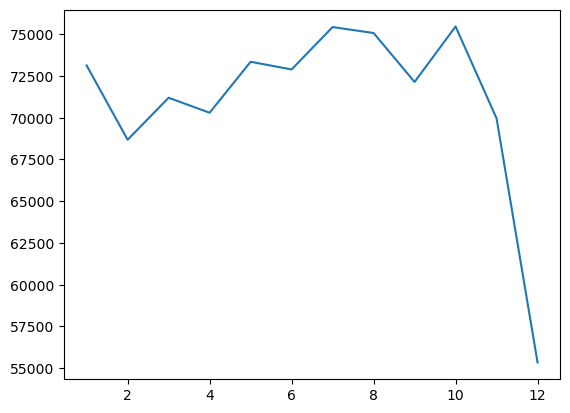

In [19]:
df['month'].value_counts().sort_index().plot()

<Axes: >

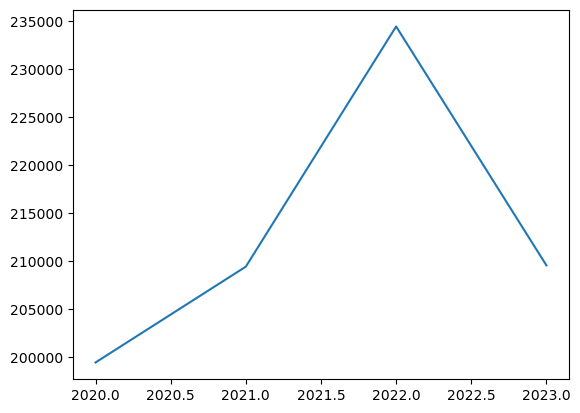

In [20]:
df['year'].value_counts().sort_index().plot()

In [21]:
df = df[~((df['month'] == 12) & (df['year'] == 2023))]

In [22]:
df.sort_values(by = 'date_occurred')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
168264,201810982,2020-05-11,2020-01-01 00:01:00,18,Southeast,1822,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",17,F,H,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,810.0,400 W CENTURY BL,33.9456,-118.2808,2020,1
196441,220706832,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,NaN,NaN,203.0,OTHER BUSINESS,IC,Invest Cont,668.0,1800 S FAIRFAX AV,34.0431,-118.3692,2020,1
1559,210708670,2021-05-11,2020-01-01 00:01:00,7,Wilshire,775,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,F,H,710.0,OTHER PREMISE,AO,Adult Other,812.0,1700 S LONGWOOD AV,34.0437,-118.3440,2020,1
199361,221818077,2022-09-28,2020-01-01 00:01:00,18,Southeast,1801,1,820,ORAL COPULATION,6,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,500 W 92ND ST,33.9528,-118.2827,2020,1
129124,201704365,2020-01-02,2020-01-01 00:01:00,17,Devonshire,1761,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,W,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,9500 OWENSMOUTH AV,34.2427,-118.6021,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672120,230717815,2023-12-01,2023-11-30 23:45:00,7,Wilshire,702,1,310,BURGLARY,30,M,B,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,700 N VISTA ST,34.0836,-118.3523,2023,11
766816,230917064,2023-12-04,2023-11-30 23:48:00,9,Van Nuys,984,1,310,BURGLARY,0,NaN,NaN,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,14600 SUTTON ST,34.1477,-118.4530,2023,11
770137,230221843,2023-12-01,2023-11-30 23:50:00,2,Rampart,216,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,1000 CORONADO TR,34.0777,-118.2688,2023,11
726894,231116332,2023-12-01,2023-11-30 23:50:00,11,Northeast,1132,2,888,TRESPASSING,0,X,X,203.0,OTHER BUSINESS,IC,Invest Cont,888.0,3200 RIVERSIDE DR,34.1143,-118.2695,2023,11


In [23]:
df['date_occurred_no_time'] = df["date_occurred"].dt.date

In [24]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05


In [25]:
crime_count_per_day = df.groupby(["date_occurred_no_time","crime_description"]).size()

In [26]:
top_20_crimes = crime_count_per_day.groupby("crime_description").mean().reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count', ascending = False).head(20)

In [27]:
top_20_crimes_sorted = top_20_crimes.sort_values(by = "average_daily_count", ascending = True)

In [28]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Top 20 Crimes')

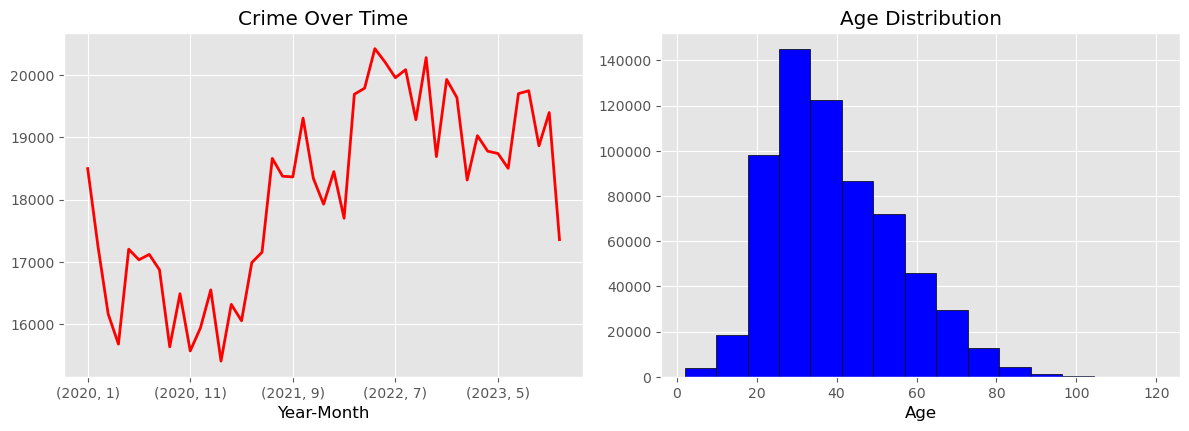

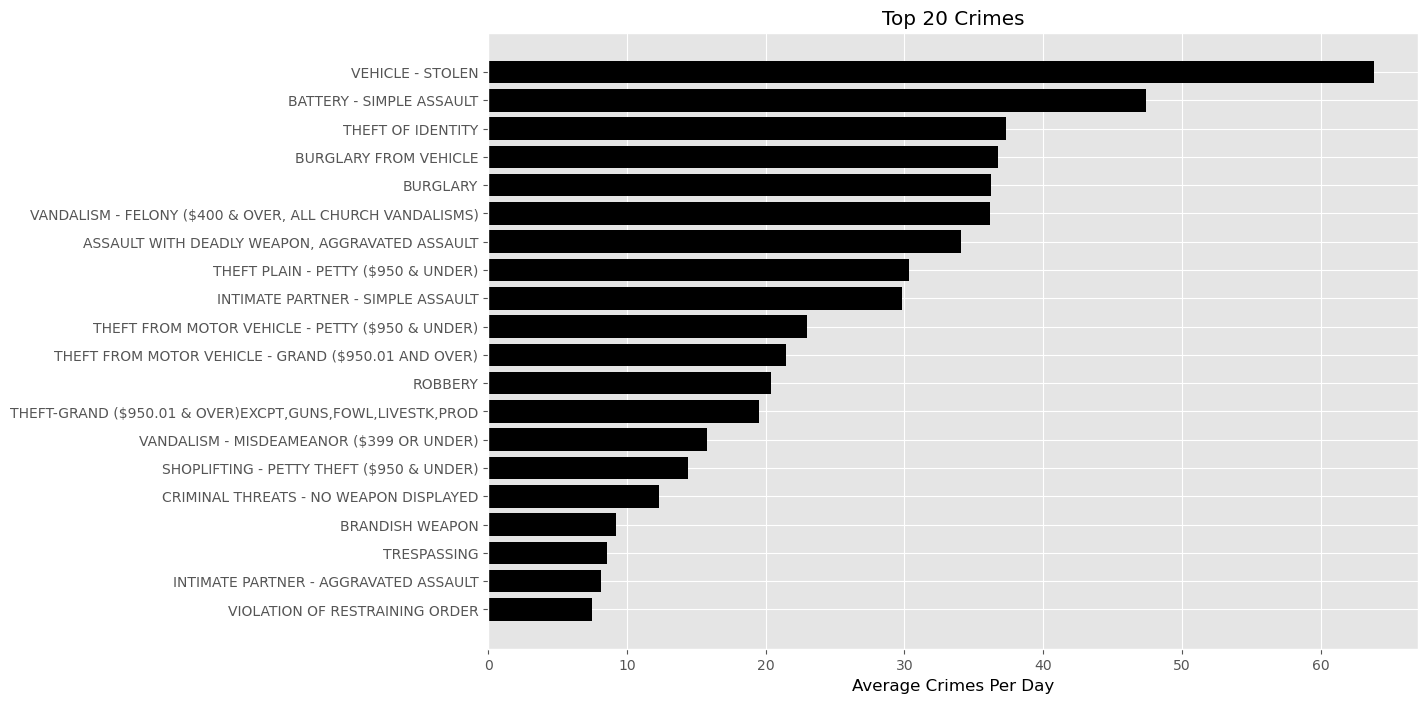

In [29]:
plt.figure(figsize =(12,8))

plt.subplot(2,2,1)
crime_plot = df.groupby(['year','month']).size().plot(color ='red', linewidth = 2)
crime_plot.set_xlabel('Year-Month', fontsize= 12)
crime_plot.set_title("Crime Over Time")

plt.subplot(2,2,2)
plt.hist(df_age["victim_age"], edgecolor ="black", bins = 15, color = 'blue')
plt.tight_layout()
plt.xlabel("Age", fontsize= 12)
plt.title("Age Distribution")

plt.figure(figsize =(12,8))
plt.barh(top_20_crimes_sorted["crime_description"], top_20_crimes_sorted["average_daily_count"], color = 'black')
plt.xlabel("Average Crimes Per Day", fontsize= 12)
plt.title("Top 20 Crimes")

In [30]:
df['Time_to_report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])).dt.days

In [31]:
df['Time_to_report'].value_counts().head(10)

0    419620
1    185029
2     52808
3     30894
4     19932
5     14416
6     10837
7      9722
8      7053
9      5660
Name: Time_to_report, dtype: int64

In [32]:
df.groupby(df['crime_description'])['Time_to_report'].mean().sort_values(ascending = False).head(10)

crime_description
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    128.181013
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                   123.779056
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ    110.913921
LEWD/LASCIVIOUS ACTS WITH CHILD                              97.324675
DISHONEST EMPLOYEE ATTEMPTED THEFT                           87.000000
BIGAMY                                                       77.666667
SEXUAL PENETRATION W/FOREIGN OBJECT                          66.092946
ORAL COPULATION                                              62.078616
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)                     61.322581
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   59.657109
Name: Time_to_report, dtype: float64

In [33]:
df.groupby(df['crime_description'])['Time_to_report'].mean().sort_values().head(10)

crime_description
FAILURE TO DISPERSE                                         0.000000
DISRUPT SCHOOL                                              0.083333
PURSE SNATCHING - ATTEMPT                                   0.083333
PETTY THEFT - AUTO REPAIR                                   0.125000
LYNCHING                                                    0.157895
FIREARMS RESTRAINING ORDER (FIREARMS RO)                    0.250000
BOMB SCARE                                                  0.345960
BATTERY POLICE (SIMPLE)                                     0.371023
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)          0.400000
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)    0.500000
Name: Time_to_report, dtype: float64

In [34]:
df_age.groupby(df['crime_description'])['victim_age'].mean().reset_index().sort_values(by = 'victim_age', ascending = False).head(10)

,crime_description,victim_age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
77,LYNCHING,53.000000
48,DOCUMENT FORGERY / STOLEN FELONY,51.899765
63,GRAND THEFT / INSURANCE FRAUD,51.714286
62,GRAND THEFT / AUTO REPAIR,51.000000
117,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",49.666667
66,ILLEGAL DUMPING,48.431818
87,"PICKPOCKET, ATTEMPT",47.500000
17,"BUNCO, GRAND THEFT",47.186109


In [35]:
# find night time crimes
night_time_crimes = df[(df['date_occurred'].dt.hour >= 20) | (df['date_occurred'].dt.hour <= 3)]

In [36]:
night_time_crimes

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time,Time_to_report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1
5,200100501,2020-01-02,2020-01-01 00:30:00,1,Central,163,1,121,"RAPE, FORCIBLE",25,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534,2020,1,2020-01-01,1
7,200100504,2020-01-04,2020-01-04 00:40:00,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,0,X,X,726.0,POLICE FACILITY,IC,Invest Cont,946.0,200 E 6TH ST,34.0448,-118.2474,2020,1,2020-01-04,0
8,200100507,2020-01-04,2020-01-04 02:00:00,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,341.0,700 BERNARD ST,34.0677,-118.2398,2020,1,2020-01-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852926,230406516,2023-03-19,2023-03-19 01:22:00,4,Hollenbeck,488,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,3200 GARNET ST,34.0248,-118.2076,2023,3,2023-03-19,0
852927,230413421,2023-10-15,2023-10-15 22:45:00,4,Hollenbeck,409,2,624,BATTERY - SIMPLE ASSAULT,58,F,H,504.0,OTHER RESIDENCE,AO,Adult Other,624.0,5100 E HUNTINGTON DR,34.0932,-118.1615,2023,10,2023-10-15,0
852930,231514016,2023-08-27,2023-08-27 00:30:00,15,N Hollywood,1548,1,761,BRANDISH WEAPON,38,M,H,101.0,STREET,AO,Adult Other,761.0,11000 MCCORMICK ST,34.1660,-118.3705,2023,8,2023-08-27,0
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1


Text(0.5, 0, 'No. of Crimes')

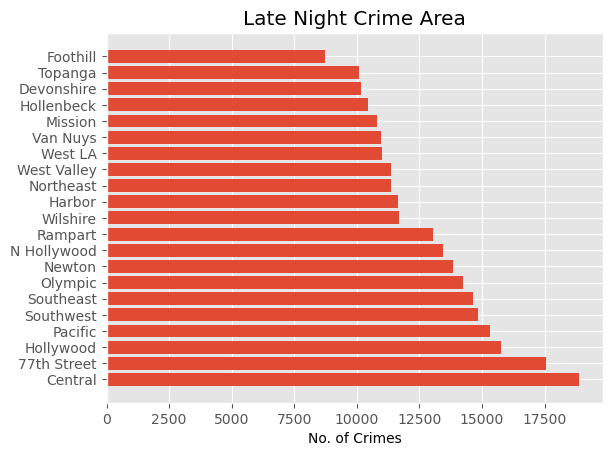

In [37]:
night_time_crime_area = night_time_crimes['area_name'].value_counts().reset_index()


plt.barh(night_time_crime_area['index'], night_time_crime_area['area_name'])
plt.title("Late Night Crime Area")
plt.xlabel("No. of Crimes")

In [38]:
night_time_crime_area

,index,area_name
0,Central,18873
1,77th Street,17568
2,Hollywood,15741
3,Pacific,15328
4,Southwest,14819
5,Southeast,14638
6,Olympic,14256
7,Newton,13843
8,N Hollywood,13428
9,Rampart,13047


In [39]:
hourly_crime = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

In [40]:
hourly_crime_reset = hourly_crime

hourly_crime_reset = hourly_crime_reset.rename(columns={
    'index': 'hour',
    'date_occured': 'crime_occured',
})

In [41]:
hourly_crime_reset

,hour,date_occurred
0,0,35061
1,1,25740
2,2,21801
3,3,19040
4,4,16099
5,5,14829
6,6,19484
7,7,21985
8,8,31428
9,9,30812


Text(0.5, 1.0, 'Crimes per hour')

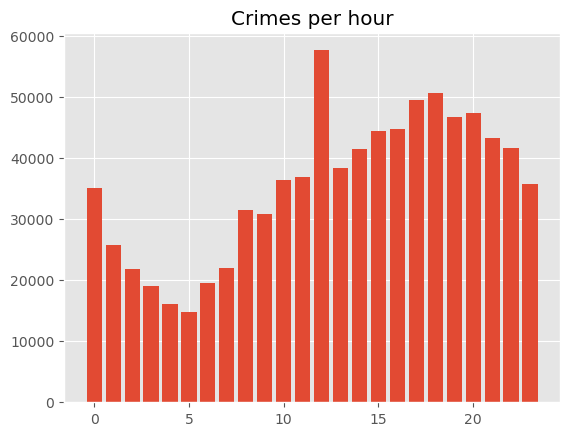

In [42]:
plt.bar(hourly_crime_reset['hour'], hourly_crime_reset['date_occurred'])
plt.title("Crimes per hour")